# Stochastic Models: Monte Carlo Methods

### Goals for Today
- Define Monte Carlo Methods and state advantages/disadvantes of the methodology
- Implement and analyze Monte Carlo Methods in a variety of examples

### Pre-Lecture Activities

- Read: Section 1.1 and 1.3 from *Monte Carlo Methods* by Malvin Kalos and Paula Whitlock.  An online pdf of the book is available for free through the UBC Library.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Clicker Questions

1. Monte Carlo utilizes which feature of statistics?

   a. Repeated random sampling
   
   b. Hypothesis testing

   c. Standard error calculations

   d. P-values

2. Monte Carlo is a computational technique, which typically is used to:

   a. Simulate an event multiple times
   
   b. Predict a range of outcomes for future events

   c. Both a and b.

3. Monte Carlo is an efficient way to solve problems.

   a. True

   b. False

   C. Depends on the problem

### Monte Carlo Key Points

- A method of repeated sampling that can be leveraged for a variety of applications
    - simulating an event multiple times
    - predict a range of outcomes for future events
    - sensitivity analysis of a solution
    
- converges quite slow - on the order of $\mathcal{O}\left(\frac{1}{\sqrt{n}}\right)$
    - require a lot of simulations to get accurate results
    - number of simulations depends on context and numerical scheme

#### Law of Large Numbers
The Law of Large Numbers says that the average of a sequence of random variables of a known distribution will converge to its expectation as the number of samples goes to infinity.  

In other words, if we perform a large number of trials, then the average of these results should be close to the expected outcome.  As we increase the number of trials, the average of our results tend towards the expected value. 

Recall here that in statistics terminology, expectation is the average.


### Unknown Probability Density Function

So far, all of the examples we have discussed today have random variables with a known probability distribution.  In practice, we rarely know the probability density function.  This can be for a number of reasons: we may not know all of the possible outcomes, we may have multiple random variables each with their own distribution that are combined through a function $f(X,Y,Z,...)$, we may know the distribution of the random variable $X$ yet not the distribution of $f(X)$, etc. We will typically have access to a *sample* of observations, from which we want to determine a probability distribution. 

The goal here is to generate a probability distribution, so that we have access to the probability of all possible outcomes of the population.  Once we know this, we are able to determine the probability of certain events occuring and make predictions based on an associated context. 

#### Monte Carlo
In the case that our scenario has multiple random variables each with their own distribution that are combined through a function $f(X,Y,Z,...)$ or that we know the distribution of the random variable $X$ yet not the distribution of $f(X)$, Monte Carlo can be leveraged to generate a sample space to visualize the probability distirbution.  Once we have a probability distribution, we can see if that distribution "looks" like a known distribution or we can try to fit the distribution of the Monte Carlo simulations using a **Kernel Density Function optimization** (the latter is outside the scope of MATH 360, but there are some packages in python that can be leveraged to fit a probability density distribution to a probability density function). We will however look at how we can form a **Kernel Density Function** from data -- next class!

**Remark** One of our main goals with probabilistic modelling will be to recover the probability distribution of a given system. The probability distribution contains a wealth of information about the scenario that can then be leveraged to determine, for example, how often certain events will happen or under what conditions a certain threshold will be met.  

Unfortunately for many systems, the probability distribution is unknown, however, we may know the distribution of certain peieces in the scenario that can be leveraged to deduce the probability distribution of the overall model.  Monte Carlo gives us a systematic way to simulate probability distributions of models. 

### Flipping a Coin
Write a Monte Carlo method to model a coin flip.

What should the average be as we add more and more coin flips?

In [2]:
# we will simulate a coin flip and then run a monte carlo simulation

# use head = 0
# and tail = 1
def coin():
    return random.randint(0,1) 

flips_mc = []
average_flip_mc = []

def monte_carlo_coin(n):
    for i in range(n):
        # flip coin 
        flip = coin() #flip the coin
        flips_mc.append(flip) #store flip
        flip_avg = np.mean(flips_mc) #average the flips
        average_flip_mc.append(flip_avg) #store average
    return

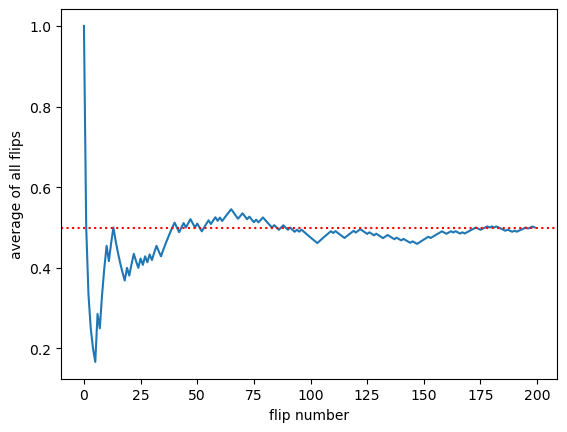

In [4]:
# plot output for n

n = 100

monte_carlo_coin(n)

#plot the average of the coin flips -- we should have that the Monte Carlo tends to 0.5 as we add more flips
plt.plot(average_flip_mc)
plt.axhline(y=0.5, color='r', linestyle=':')
plt.xlabel('flip number')
plt.ylabel('average of all flips')
plt.show()

Remarks:
1. Notice here that for small $n$ values, we have a more oscillatory behaviour in the average value.
2. As we increase the $n$ value, the average flip value tends towards $\frac{1}{2}$, which is our expected value.

### Dice Sum
Using Monte Carlo, simulate rolling two dice and tracking the sum.  In particular, simulate 200 dice rolls and then plot the distribution of the sums.  

In [4]:
#define a function to roll dice and add sum

def sum_dice():
    return random.randint(1,6) + random.randint(1,6)

In [5]:
#create a function that generates 200 dice rolls
number = 200 

rolls = []

for i in range(number):
    roll = sum_dice()
    rolls.append(roll)

In [6]:
print(np.mean(rolls))

6.975


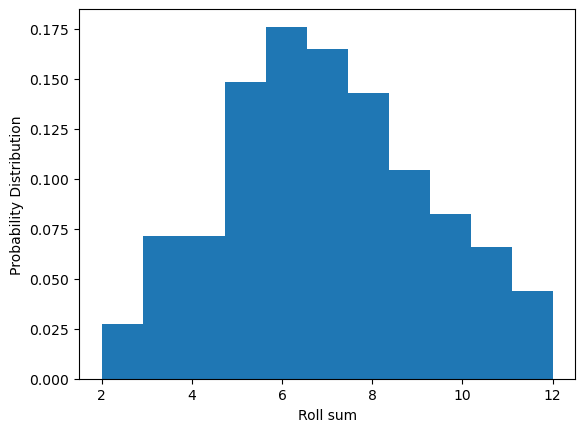

In [7]:
#turn into probability distribution
buckets = 11 #make 11 bins between - one for each discrete sum 2 through 12

plt.hist(rolls, buckets, density = True)
plt.ylabel('Probability Distribution')
plt.xlabel('Roll sum')
plt.show()

In [8]:
## let's turn this into a monte carlo function where we can just input the number
## of samples that we want 

rolls_mc = []
rolls_average_mc = []

def monte_carlo(n):
    for i in range(n):
        # roll dice
        roll = sum_dice()
        rolls_mc.append(roll)
        
        roll_avg = np.mean(rolls_mc)
        rolls_average_mc.append(roll_avg)
    return

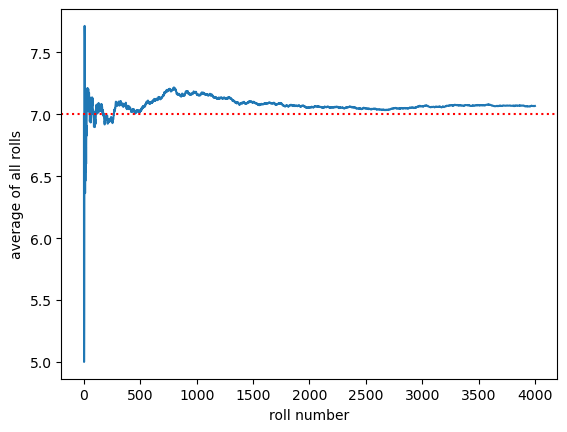

In [9]:
monte_carlo(4000)

#plot the roll average
plt.plot(rolls_average_mc)
plt.axhline(y=7, color='r', linestyle=':')
plt.xlabel('roll number')
plt.ylabel('average of all rolls')
plt.show()

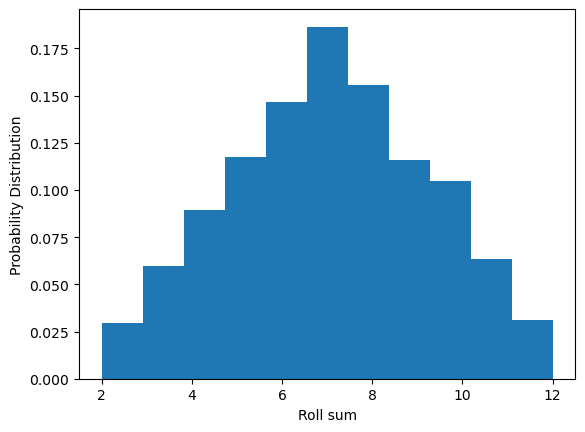

In [10]:
#turn into probability distribution
buckets = 11 

plt.hist(rolls_mc, buckets, density = True)
plt.ylabel('Probability Distribution')
plt.xlabel('Roll sum')
plt.show()

Notice here how our visualization of the Monte Carlo simulations appears to give us a Normal distribution. Let's try to fit it using the Normal's probability density function. 

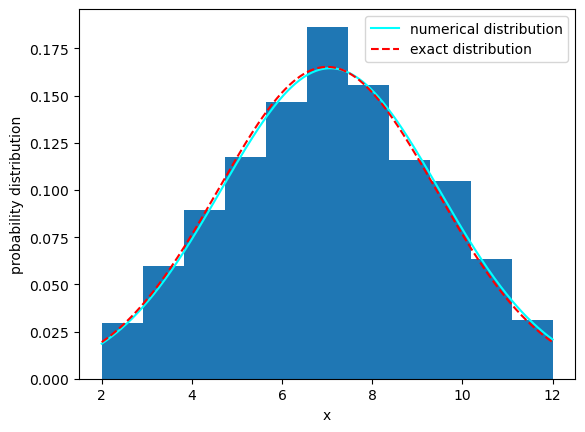

In [11]:
# plot a normal distribution on the data 
mean_roll = np.mean(rolls_mc)
std_roll = np.std(rolls_mc)

x = np.linspace(2,12,1000) #here we use 2 to 12 since these are the possible outcomes for the sum of dice rolls

# if you would prefer to explicitly use the normal distribution function uncomment the following line 
# normal_dist = 1 / (std_roll*np.sqrt(2*np.pi)) * np.exp(-0.5* ((x-mean_roll)/std_roll)**2)
normal_dist = norm.pdf(x,mean_roll,std_roll)

#calculate exact variance; exact mean is 7
#by definition st deviation is sqrt(variance-(expected value^2))
var = 2*2*(1/36)+3*3*(1/18)+4*4*(1/12)+5*5*(1/9)+6*6*(5/36)+7*7*(1/6)+8*8*(5/36)+9*9*(1/9)+10*10*(1/12)+11*11*(1/18)+12*12*(1/36)
std = np.sqrt(var-7*7)

exact_normal_dist = norm.pdf(x,7,std)

plt.hist(rolls_mc, 11, density = True) #call the histogram from the previous block
plt.plot(x,normal_dist,color="cyan",label = "numerical distribution") # plot the probability distribution
plt.plot(x,exact_normal_dist, color="red",linestyle = "dashed",label="exact distribution")
plt.xlabel('x')
plt.ylabel('probability distribution')
plt.legend()
plt.show()

**Remark:** The curves for the distribution look okay.  If we wanted to achieve a more accurate result, then we should run more Monte Carlo simulations.

### Rolling a Die -- Monte Carlo
Using Monte Carlo, construct a model that will produce the probability density of rolling a die. 

Then answer the following questions:
- Do the plots look how you would expect?
- What happens when you increase the number of Monte Carlo simulations?
    - Why do you think you are seeing this effect?
- What are the advantages and disadvantages of using a Monte Carlo simulation in this context? 

In [12]:
def die_roll():
    return random.randint(1,6)

3.53


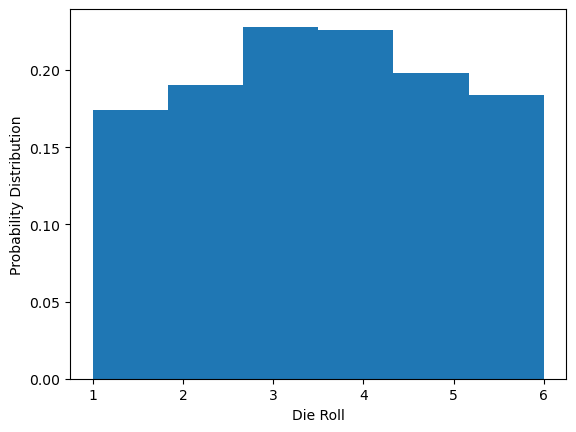

In [13]:
#create a function that generates 600 die rolls
number = 600 

roll = []

for i in range(number):
    roll1 = die_roll()
    roll.append(roll1)
    
#print the average roll value
print(np.mean(roll))
    
#turn into probability distribution
buckets = 6 #make 6 bins between - one for each discrete sum 2 through 12

plt.hist(roll, buckets, density = True)
plt.ylabel('Probability Distribution')
plt.xlabel('Die Roll')
plt.show()

Since each side of the die is equally likely, we would expect to see a uniform distribution of the rolls. Let's plot the exact uniform distribution on the histogram.

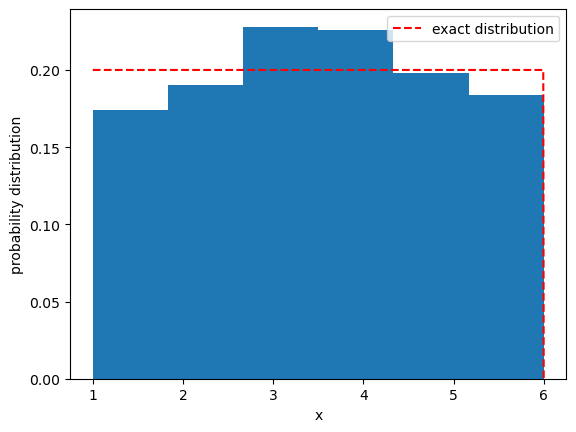

In [14]:
a = 1 # left endpoint
b = 6 # right endpoint

x = np.linspace(1,6,1000) #here we use 2 to 12 since these are the possible outcomes for the sum of dice rolls

uniform = lambda x,a,b: 1/(b-a)*(np.heaviside(x-a,1) - np.heaviside(x-b,1))

plt.hist(roll, 6, density = True) #call the histogram from the previous block
plt.plot(x,uniform(x,a,b), color="red",linestyle = "dashed",label="exact distribution")
plt.xlabel('x')
plt.ylabel('probability distribution')
plt.legend()
plt.show()

### Transit Travel Time

Let's suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Construct a model to calculate the probability that the time to reach campus is less than 30 minutes.

**Problem Statement** 
Determine the proability that the transit time to campus is less than 30 minutes.

Simulate the transit time to campus.

How early should we get up to get to campus?

Determine the probability distribution of the transit time to UBC campus and determine the probability that the time to reach campus is less than 30 minutes.

**Variables and Parameters**

Random variables
- $X1$: Time for first bus trip
- $X2$: Time for second bus trip
- $Y$: Total travel time

Parameters:
- $\mu_1$: Average time for first bus trip
- $\sigma_1^2$: Variance for first bus trip
- $\mu_2$: Average time for second bus trip
- $\sigma_2^2$: Variance for second bus trip
- $\mu_Y$: Average time for total bus trip
- $\sigma_Y^2$: Variance for total bus trip

**Assumptions and Variables**
- Random variables $X1$ and $X2$ are normallly distributed.
- Events are independent.
- There is no wait time between the first and second busses.

**Build Solutions**

In [15]:
N = 10000

# bus trips
X1 = np.random.normal(loc = 11, scale = np.sqrt(2), size = N) #normally distributed with mean 11 and variance 2
X2 = np.random.normal(loc = 20, scale = np.sqrt(4), size = N) #normally distributed with mean 20 and variance 4

#total time on the bus
Y = X1 + X2

**Analyze and Assess:**

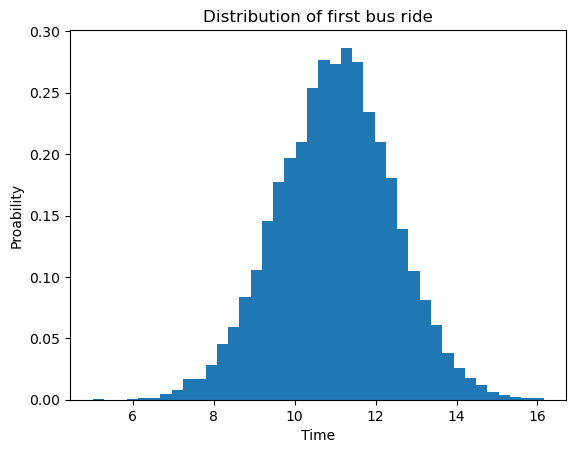

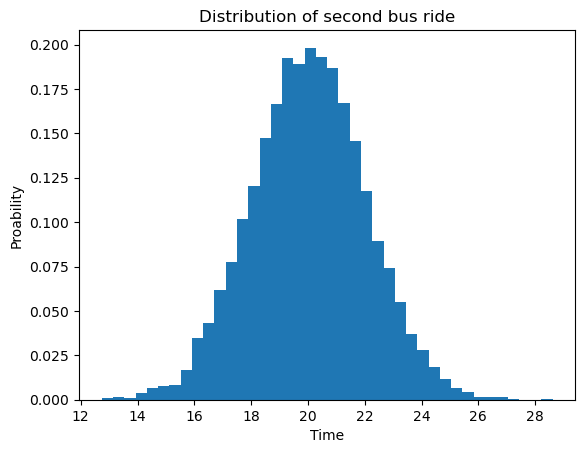

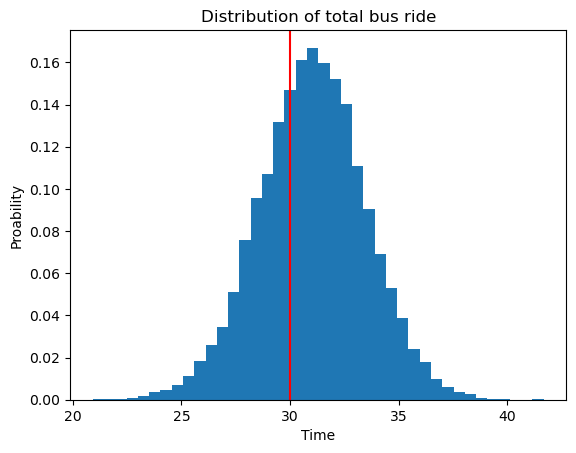

In [16]:
#plot histogram of X1
plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')


#plot histogram of X2
plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

#plot histogram of total trip Y = X1 + X2
plt.hist(Y,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

In [17]:
# calculate probability 
# what to calculate the probability that the transit time is less than 30 minutes

prob = np.sum(Y<30)/len(Y) * 100

print(prob,"%")

33.09 %


The estimated probability that our transit time is less than 30 minutes is about $33.09\%.$  Based on the distribution of travel times for the total bus ride, this seems reasonable.  We have approximately a third of the graph to the left of the vertical red line. 

Some areas for improvement:
- it is likely not the case that there will be no waiting time between busses, so adding in a refinement to account for waiting time would provide a more accurate answer
- it would be helpful to generate the probability density function from our data points (next class!)

**Remark:**
Algebraically, we can show that the sum of two Normal distributions, is in fact also normal.  In fact, for $X_1$ and $X_2$, we can expect that $Y=X_1+X_2$ will also be Normal with mean $\mu_Y = \mu_{X_1} + \mu_{X_2}$ and variance $\sigma^2_Y = \sigma^2_{X_1} + \sigma^2_{X_2}.$

For the bus example, this means that for the overall trip we should expect that the response $Y$ is normally distributed with an average of $31$ and a variance of $6$. 

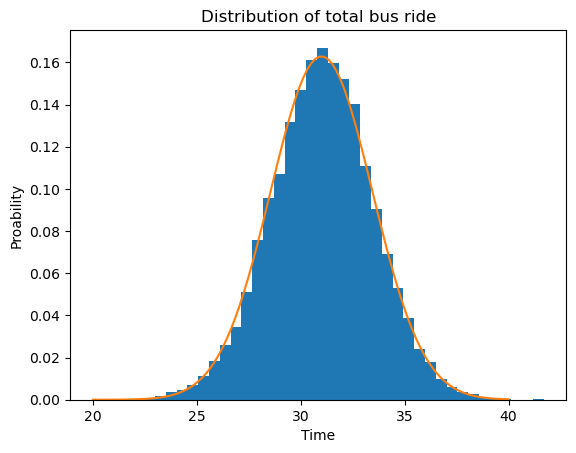

In [18]:
x = np.linspace(20,40,100)
plt.hist(Y,bins = 40, density = True) 
plt.plot(x,1 / (np.sqrt(6)*np.sqrt(2*np.pi)) * np.exp(-0.5* ((x-31)/np.sqrt(6))**2)) ##normal curve
plt.title('Distribution of total bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

### Transit Travel Time 2

Let's again suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Between getting off of the first bus and getting on the second bus, we have to wait an average of 5 minutes.  Assume that the wait time is exponentially distributed.  

Construct a model to calculate the probability that the time to reach campus is less than 30 minutes.

**Problem Statement** 

Determine the probability distribution of the transit time to UBC campus and determine the probability that the time to reach campus is less than 30 minutes.

**Variables and Parameters**

Random variables
- $X1$: Time for first bus trip
- $X2$: Time for second bus trip
- $X3$: Time to wait between first bus and second bus
- $Y$: Total time for trip

Parameters:
- $\mu_1$: Average time for first bus trip
- $\sigma_1^2$: Variance for first bus trip
- $\mu_2$: Average time for second bus trip
- $\sigma_2^2$: Variance for second bus trip
- $\mu_3$: Average wait time between bus one and bus two
- $\mu_Y$: Average time for total bus trip
- $\sigma_Y^2$: Variance for total bus trip

**Assumptions and Variables**
- Random variable $X1$ is normally distributed.
- Random variable $X2$ is normally distributed.
- Random variable $X3$ is exponentially distributed.
- Events are independent.
- There are no additional wait times except the wait time between the first and second busses.

**Build Solutions**

In [19]:
#number of Monte Carlo simulations
N = 20000 

#bus distributions
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N) #normally distributed with mean 11 and variance 2
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N) #normally distributed with mean 20 and variacne 4
X3 = np.random.exponential(scale=5 ,size=N) # exponentially distributed with mean 5

# total bus time
Y = X1 + X2 + X3

**Analyze and Assess**

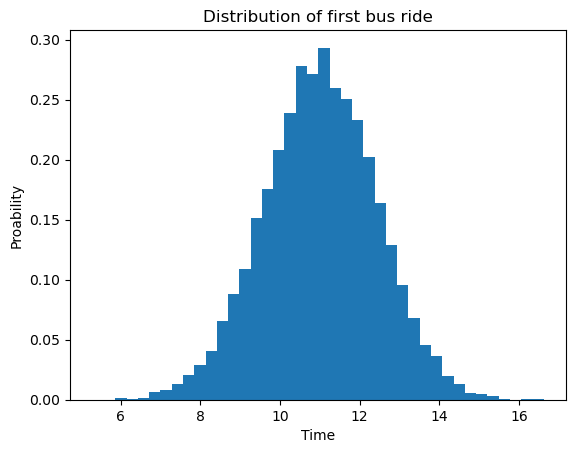

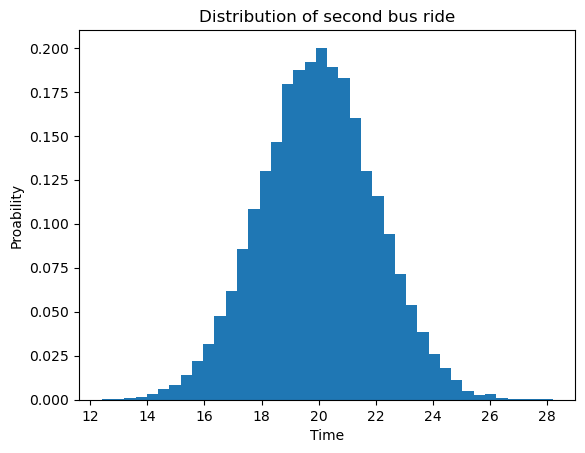

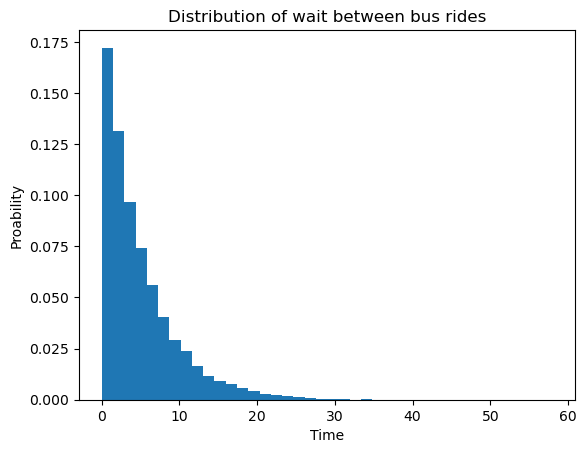

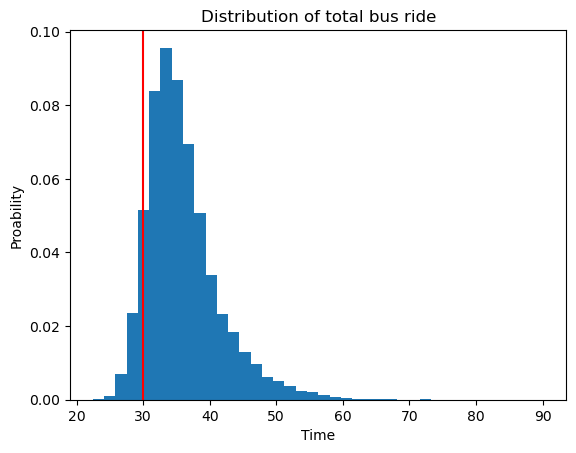

In [20]:
#plot histogram of X1
plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

#plot histogram of X2
plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

#plot histogram of X3
plt.hist(X3, bins = 40,density=True)
plt.title('Distribution of wait between bus rides')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

#plot histogram of total trip Y = X1 + X2 + X3
plt.hist(Y,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlabel('Time')
plt.ylabel('Proability')
plt.show()

In [21]:
# calculation of probability that bus trip is less than 30 minutes

prob = np.sum(Y < 30)/len(Y)*100
print(prob, "%")

8.815000000000001 %


The estimated probability that our transit time is less than 30 minutes is about $8.815\%.$  Based on the distribution of travel times for the total bus ride, this seems reasonable. When compared to the previous travel time model, the addition of a wait time decreases the probability that we will get to UBC campus within 30 minutes.  This makes sense, as we will be spending some time waiting for the bus, which will decrease our chance at arriving before 30 minutes. 

Some areas for improvement:
- if we are looking to estimate our total travel time to UBC campus, we may also want to include information about how long it takes us to get to the bus stop from where we live and well as to the building on campus that we are going to
- again, it would be helpful to generate the probability density function from our data points (next class!)

**Remark:** In general, we will not know the distribution type when we combine random variables. While we can combine two normal distributions together and know that the resutl will be normal, we do not have this result in general for other random variable distributions. For example, if we have a uniformally distributed random variable and a gamma distributed random variable, we do not know what the resulting distribution will be.  We therefore need to simulate it -- hence Monte Carlo!